In [7]:
import matplotlib.pyplot as plt

from simphony.libraries import siepic
from simphony.die import Die

In [9]:
def ring_factory(radius):
  """Creates a full ring (with terminator) from a half ring.

  Resulting pins are ('pass', 'in', 'out').

  Parameters
  ----------
  radius : float
      The radius of the ring resonator, in meters.
  """
  # Have rings for selecting out frequencies from the data line.
  # See SiPANN's model API for argument order and units.
  halfring1 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=radius, gap=100e-9)
  halfring2 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=radius, gap=100e-9)
  terminator = siepic.Terminator()

  halfring1.rename_pins("pass", "midb", "in", "midt")
  halfring2.rename_pins("out", "midt", "term", "midb")

  # the interface method will connect all of the pins with matching names
  # between the two components together
  halfring1.interface(halfring2)
  halfring2["term"].connect(terminator)

  # bundling the circuit as a Subcircuit allows us to interact with it
  # as if it were a component
  return halfring1.circuit.to_subcircuit()

In [18]:
wg_input = siepic.Waveguide(100e-6, name="wg_input")
wg_out1 = siepic.Waveguide(100e-6, name="wg_out1")
wg_connect1 = siepic.Waveguide(100e-6, name="wg_connect1")
wg_out2 = siepic.Waveguide(100e-6, name="wg_out2")
wg_connect2 = siepic.Waveguide(100e-6, name="wg_connect2")
wg_out3 = siepic.Waveguide(100e-6, name="wg_out3")
terminator = siepic.Terminator(name="terminator")

# ring1 = ring_factory(10e-6)
# ring1.circuit.to_subcircuit().name = "ring1"
# ring2 = ring_factory(11e-6)
# ring2.circuit.to_subcircuit().name = "ring2"
# ring3 = ring_factory(12e-6)
# ring3.circuit.to_subcircuit().name = "ring3"

ring1 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=10e-6, gap=100e-9, name="ring1")
halfring1 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=10e-6, gap=100e-9)
terminator = siepic.Terminator()

ring1.rename_pins("pass", "midb", "in", "midt")
halfring1.rename_pins("out", "midt", "term", "midb")

# the interface method will connect all of the pins with matching names
# between the two components together
ring1.interface(halfring1)
halfring1["term"].connect(terminator)

ring2 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=11e-6, gap=100e-9, name="ring2")
halfring2 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=11e-6, gap=100e-9)
terminator = siepic.Terminator()

ring2.rename_pins("pass", "midb", "in", "midt")
halfring2.rename_pins("out", "midt", "term", "midb")

# the interface method will connect all of the pins with matching names
# between the two components together
ring2.interface(halfring2)
halfring2["term"].connect(terminator)

ring3 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=12e-6, gap=100e-9, name="ring3")
halfring3 = siepic.HalfRing(width=500e-9, thickness=220e-9, radius=12e-6, gap=100e-9)
terminator = siepic.Terminator()

ring3.rename_pins("pass", "midb", "in", "midt")
halfring3.rename_pins("out", "midt", "term", "midb")

# the interface method will connect all of the pins with matching names
# between the two components together
ring3.interface(halfring3)
halfring3["term"].connect(terminator)

die = Die()

c:\Users\s39chand\Documents\GitHub\simphony\simphony\libraries\siepic\__init__.py:440: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 1e-07, 'radius': 1.1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
NOTE: Model attributes may have been automatically modified.
  warnings.warn(msg, UserWarning)
c:\Users\s39chand\Documents\GitHub\simphony\simphony\libraries\siepic\__init__.py:440: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 1e-07, 'radius': 1.2e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}

In [19]:
die.add_components([ring1, ring2, ring3, terminator])

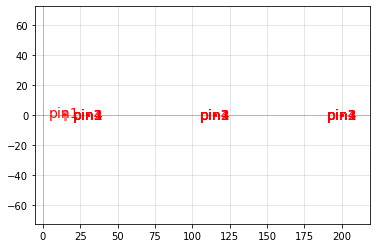

In [21]:
die.distribute_devices(spacing=5)

die.visualize()